In [150]:
import pandas as pd
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
data = pd.read_csv(r"D:\auro\forecasting_train.csv")


In [152]:
df1=pd.DataFrame(data)
df1.head()

,date,count
0,2021-01-01,1918
1,2021-01-02,3192
2,2021-01-03,1458
3,2021-01-04,3592
4,2021-01-05,3474


In [153]:
df1['date'] = pd.to_datetime(df1['date'])

# Add a new column with the day of the week
df1['day_of_week'] = df1['date'].dt.day_name()

# Display the updated DataFrame
df1.head()

,date,count,day_of_week
0,2021-01-01,1918,Friday
1,2021-01-02,3192,Saturday
2,2021-01-03,1458,Sunday
3,2021-01-04,3592,Monday
4,2021-01-05,3474,Tuesday


In [154]:
gvtholi = pd.read_csv(r"D:\auro\government holidays.csv")

In [155]:
df_gvt=pd.DataFrame(gvtholi)

In [156]:
df_gvt.head()

,Public Holiday,Date,Day
0,New Year's Day,01.01.2021,Friday
1,Pongal,14.01.2021,Thursday
2,Thiruvalluvar Day,15.01.2021,Friday
3,Uzhavar Thirunal,16.01.2021,Saturday
4,Republic Day,26.01.2021,Tuesday


In [157]:
df_gvt['Date'] = pd.to_datetime(df_gvt['Date'], format='%d.%m.%Y')

# Convert date in df to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Check column names
print("df_gvt columns:", df_gvt.columns)
print("df columns:", df1.columns)


df_gvt columns: Index(['Public Holiday', 'Date', 'Day'], dtype='object')
df columns: Index(['date', 'count', 'day_of_week'], dtype='object')


In [158]:

df = pd.merge(df1, df_gvt, how='left', left_on='date', right_on='Date')

# Replace NaN in 'Public Holiday' column with "Working Day"
df['Public Holiday'] = df['Public Holiday'].fillna('Working Day')

# Drop the redundant 'Date' column
df = df.drop(columns=['Date','Day'])

# Display the result
print(df)

           date  count day_of_week  Public Holiday
0    2021-01-01   1918      Friday  New Year's Day
1    2021-01-02   3192    Saturday     Working Day
2    2021-01-03   1458      Sunday     Working Day
3    2021-01-04   3592      Monday     Working Day
4    2021-01-05   3474     Tuesday     Working Day
...         ...    ...         ...             ...
1334 2024-08-27   4468     Tuesday     Working Day
1335 2024-08-28   4621   Wednesday     Working Day
1336 2024-08-29   4290    Thursday     Working Day
1337 2024-08-30   3903      Friday     Working Day
1338 2024-08-31   4360    Saturday     Working Day

[1339 rows x 4 columns]


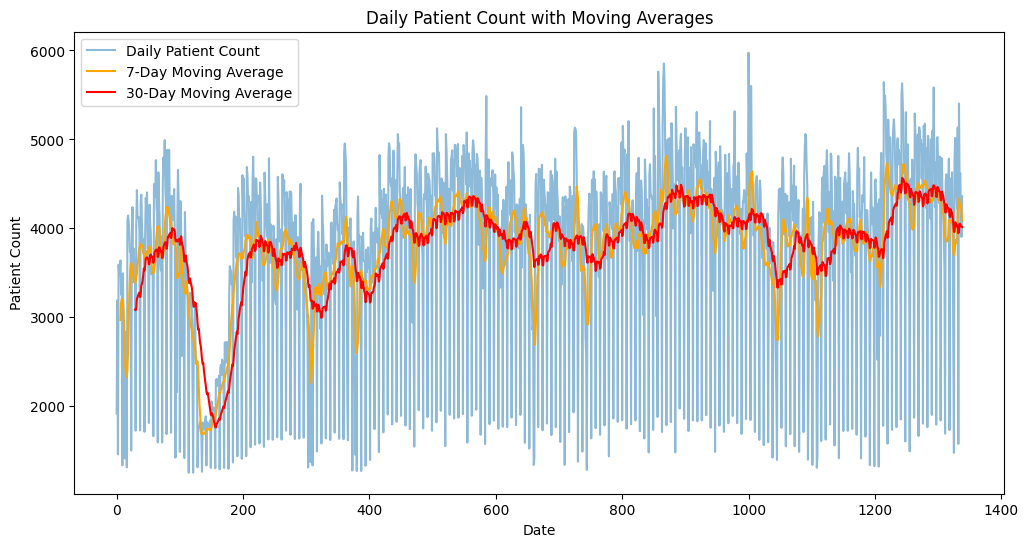

In [160]:
df['7-day MA'] = df['count'].rolling(window=7).mean()  # Weekly average
df['30-day MA'] = df['count'].rolling(window=30).mean()  # Monthly average

plt.figure(figsize=(12, 6))
plt.plot(df['count'], label='Daily Patient Count', alpha=0.5)
plt.plot(df['7-day MA'], label='7-Day Moving Average', color='orange')
plt.plot(df['30-day MA'], label='30-Day Moving Average', color='red')
plt.title('Daily Patient Count with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

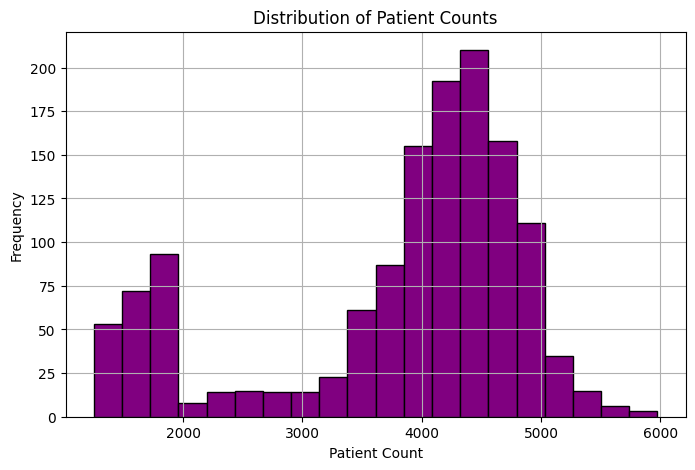

In [163]:
# Plot histogram of patient counts
plt.figure(figsize=(8, 5))
plt.hist(df['count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Patient Counts')
plt.xlabel('Patient Count')
plt.ylabel('Frequency')
plt.grid()
plt.show()



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


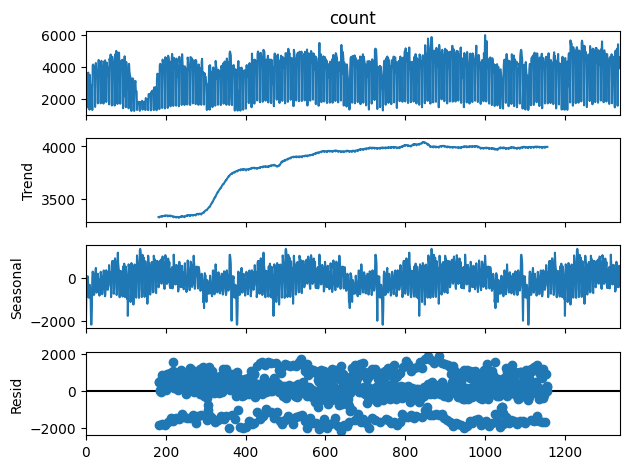

In [161]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['count'], model='additive', period=365)  # Daily data, 1 year seasonality
decomposition.plot()
plt.show()


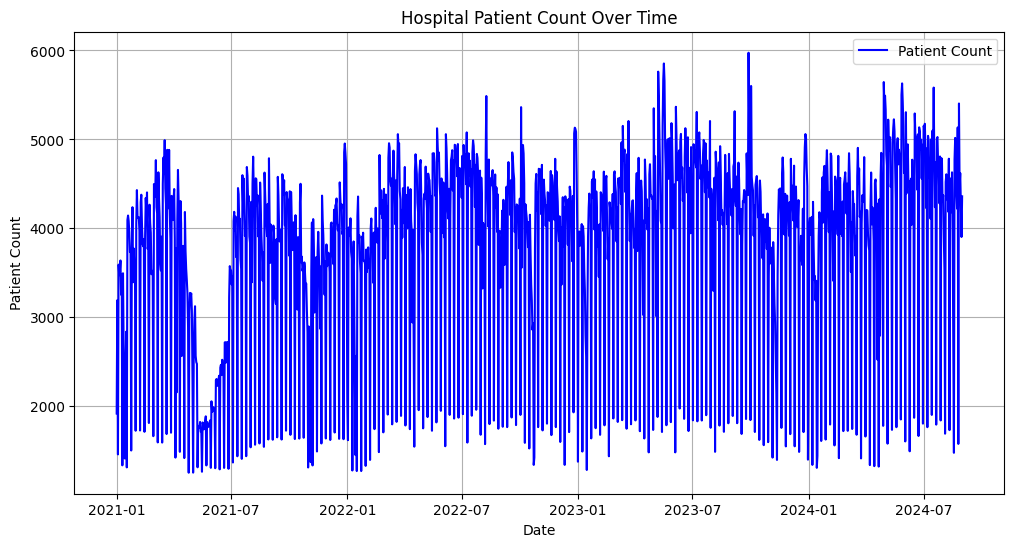

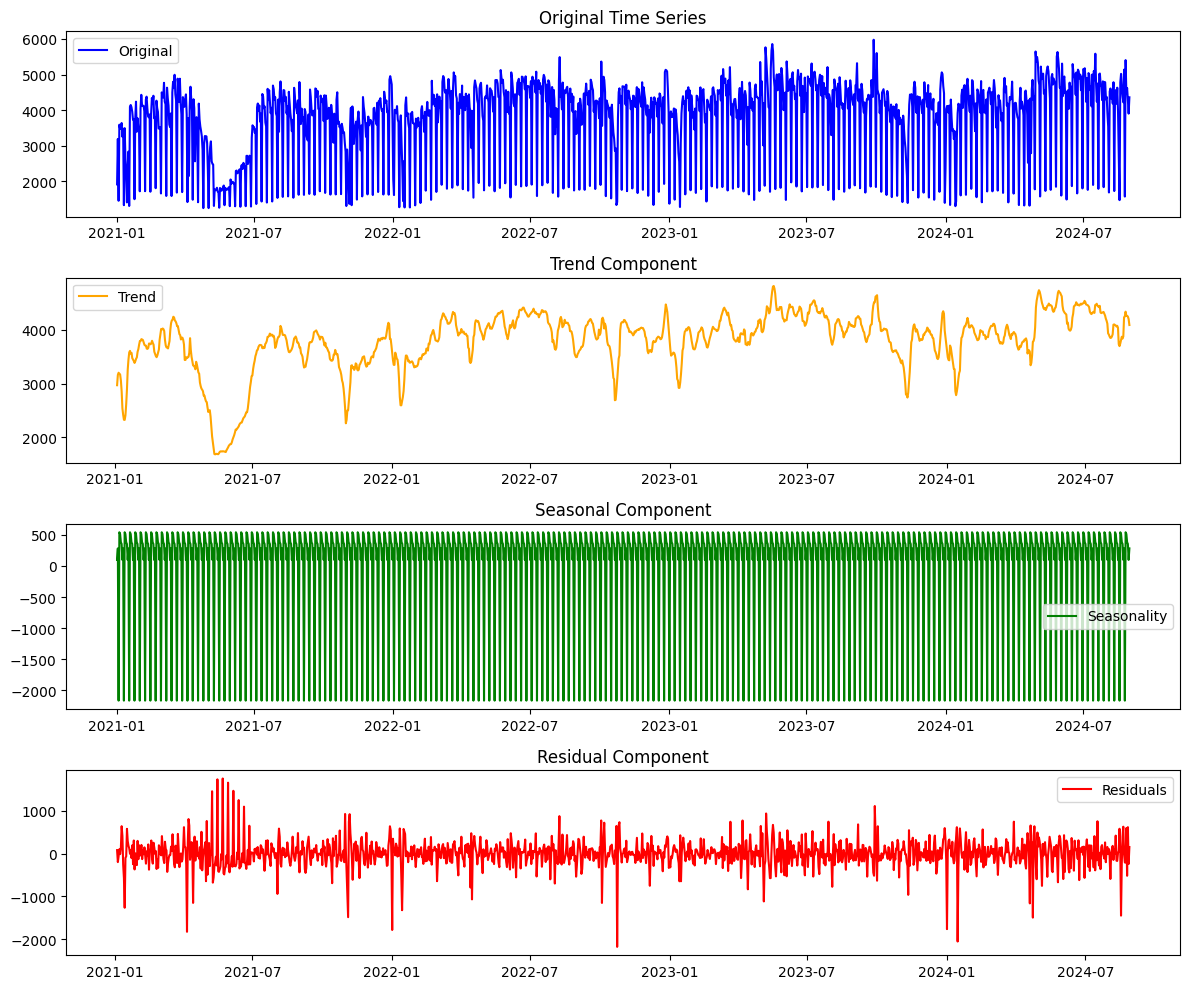

In [162]:

# Set 'date' as the index
df.set_index('date', inplace=True)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df['count'], label='Patient Count', color='blue')
plt.title('Hospital Patient Count Over Time')
plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.legend()
plt.grid()
plt.show()

# Seasonal decomposition
# Perform decomposition with an assumed weekly period (7 days)
decomposition = seasonal_decompose(df['count'], model='additive', period=7)

# Plot the decomposition
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(df['count'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [159]:
# Save DataFrame to CSV
df.to_csv('processed.csv', index=False)

print("DataFrame saved as 'processed.csv'")


PermissionError: [Errno 13] Permission denied: 'processed.csv'

In [121]:
print(df['count'].min())  # Prints the minimum value of the 'count' column
print(df['count'].max())


1252
5975


In [122]:
# Find the row with the minimum count
min_count_row = df.loc[df['count'].idxmin()]

# Find the row with the maximum count
max_count_row = df.loc[df['count'].idxmax()]

# Print the day and public holiday for the minimum count
print(f"Day with minimum count: {min_count_row['day_of_week']}")
print(f"Day Feature: {min_count_row['Public Holiday']}")
print(f"Minimum count: {min_count_row['count']}")

# Print the day and public holiday for the maximum count
print(f"\nDay with maximum count: {max_count_row['day_of_week']}")
print(f"Day Feature: {max_count_row['Public Holiday']}")
print(f"Maximum count: {max_count_row['count']}")


Day with minimum count: Sunday
Day Feature: Mahaveer Jayanthi
Minimum count: 1252

Day with maximum count: Thursday
Day Feature: Milad-un-Nabi
Maximum count: 5975


In [123]:
ups = df[(df['count'] > 5000)]
downs=df[(df['count'] < 1500)]
# Display the filtered rows

In [124]:
print(ups)
ups.shape[0]

           date  count day_of_week    Public Holiday
445  2022-03-22   5059     Tuesday       Working Day
507  2022-05-23   5125      Monday       Working Day
521  2022-06-06   5059      Monday       Working Day
554  2022-07-09   5079    Saturday       Working Day
585  2022-08-09   5488     Tuesday          Muharram
...         ...    ...         ...               ...
1298 2024-07-22   5009      Monday       Working Day
1299 2024-07-23   5027     Tuesday       Working Day
1327 2024-08-20   5017     Tuesday       Working Day
1331 2024-08-24   5135    Saturday       Working Day
1333 2024-08-26   5404      Monday  Krishna Jayanthi

[72 rows x 4 columns]


72

In [125]:
print(downs)
downs.shape[0]

           date  count day_of_week  \
2    2021-01-03   1458      Sunday   
9    2021-01-10   1335      Sunday   
13   2021-01-14   1412    Thursday   
16   2021-01-17   1312      Sunday   
93   2021-04-04   1422      Sunday   
100  2021-04-11   1487      Sunday   
107  2021-04-18   1417      Sunday   
114  2021-04-25   1252      Sunday   
121  2021-05-02   1253      Sunday   
128  2021-05-09   1313      Sunday   
135  2021-05-16   1263      Sunday   
142  2021-05-23   1334      Sunday   
149  2021-05-30   1307      Sunday   
156  2021-06-06   1303      Sunday   
163  2021-06-13   1290      Sunday   
170  2021-06-20   1306      Sunday   
177  2021-06-27   1296      Sunday   
184  2021-07-04   1367      Sunday   
191  2021-07-11   1437      Sunday   
198  2021-07-18   1408      Sunday   
205  2021-07-25   1438      Sunday   
303  2021-10-31   1311      Sunday   
307  2021-11-04   1371    Thursday   
310  2021-11-07   1334      Sunday   
317  2021-11-14   1491      Sunday   
373  2022-01

56

In [ ]:
print(ups['day_of_week'].value_counts())


day_of_week
Monday       23
Tuesday      19
Wednesday    13
Thursday      8
Saturday      7
Friday        2
Name: count, dtype: int64


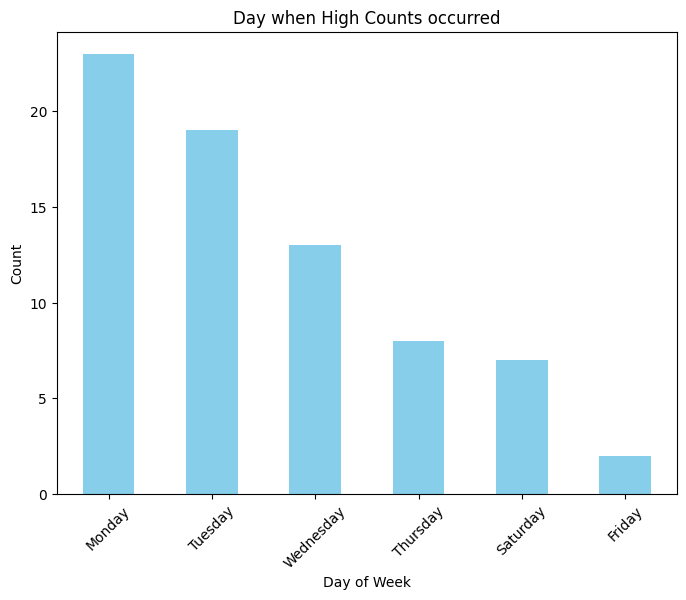

In [ ]:
day_of_week_counts = ups['day_of_week'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Day when High Counts occurred')
plt.xticks(rotation=45)
plt.show()

In [128]:
print (ups['Public Holiday'].value_counts())

Public Holiday
Working Day                 61
Muharram                     3
May Day                      2
Telugu New Year's 1  Day     1
Krishna Jayanthi 3           1
Milad-un-Nabi                1
Gandhi Jayanthi              1
Bakrid (Idul Azha)           1
Krishna Jayanthi             1
Name: count, dtype: int64


In [129]:
print(downs['day_of_week'].value_counts())

day_of_week
Sunday      51
Thursday     2
Monday       2
Friday       1
Name: count, dtype: int64


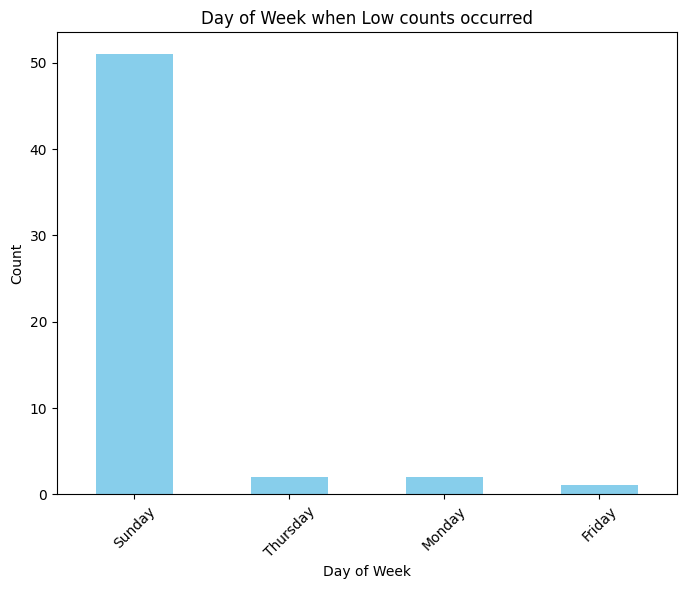

In [ ]:
day_of_week_counts = downs['day_of_week'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Day of Week when Low counts occurred')
plt.xticks(rotation=45)
plt.show()

In [133]:
print(downs['Public Holiday'].value_counts())

Public Holiday
Working Day                                           44
Pongal                                                 4
Deepavali                                              3
Mahaveer Jayanthi                                      2
Uzhavar Thirunal                                       1
New Year's Day                                         1
Tamil New Year's Day / Dr. B.R.Ambedkar's Birthday     1
Name: count, dtype: int64


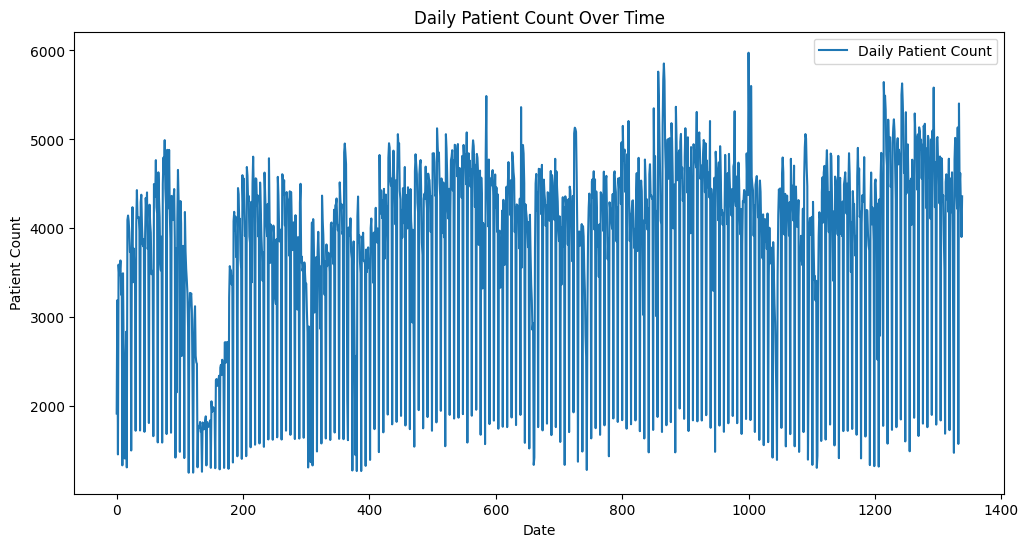

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['count'], label='Daily Patient Count')
plt.title('Daily Patient Count Over Time')
plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.legend()
plt.show()

In [97]:
pip install prophet


     ---------------------------------------- 13.3/13.3 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 94.5/94.5 kB 186.0 kB/s eta 0:00:00
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install scikit-learn




[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 11.1/11.1 MB 1.8 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [19]:
!pip install xgboost


     -------------------------------------- 124.9/124.9 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install statsmodels pmdarima prophet neuralprophet tensorflow keras scikit-learn matplotlib


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\auro\\myvirtual\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-43e11ff0749b8cbe0a615c9cf6737e0e.dll'
Check the permissions.


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 613.3/613.3 kB 603.0 kB/s eta 0:00:00
     -------------------------------------- 145.8/145.8 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.8 MB/s eta 0:00:00
  Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
     ---------------------------------------- 2.8/2.8 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 819.3/819.3 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 203.1/203.1 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 19.1/19.1 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 927.3/927.3 kB 3.9 MB/s eta 

In [30]:
pip install --upgrade numpy


  Using cached numpy-2.2.1-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install pmdarima==2.0.3



     -------------------------------------- 569.7/569.7 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.0.4
    Uninstalling pmdarima-2.0.4:
      Successfully uninstalled pmdarima-2.0.4



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!pip install neuralprophet



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached neuralprophet-0.9.0-py3-none-any.whl (145 kB)
  Using cached pytorch_lightning-2.5.0.post0-py3-none-any.whl (819 kB)
  Using cached torchmetrics-1.6.1-py3-none-any.whl (927 kB)
  Using cached torch-2.5.1-cp310-cp310-win_amd64.whl (203.1 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Using cached captum-0.7.0-py3-none-any.whl (1.3 MB)
  Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached lightning_utilities-0.11.9-py3-none-any.whl (28 kB)
  Using cached fsspec-2024.12.0-py3-none-any.whl (183 kB)
  Using cached grpcio-1.69.0-cp310-cp310-win_amd64.whl (4.4 MB)
  Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
  Using cached Markdown-3.7-py3-none-any.whl (106 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl

In [40]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached h5py-3.12.1-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl (126 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached rich-13.9.4-py3-none-any.whl (242 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-win_amd64.whl (102 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
#from pmdarima import auto_arima
from prophet import Prophet
from neuralprophet import NeuralProphet
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN

#from pmdarima import auto_arima
print("pmdarima and numpy are working fine!")

# Extract features
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["day_of_week"] = df["date"].dt.dayofweek

# Encode categorical features
df["Public Holiday"] = df["Public Holiday"].apply(lambda x: 1 if x != "Working Day" else 0)

# Prepare features and target
X = df[["day_of_week", "Public Holiday", "day", "month", "year"]]
y = df["count"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Function to calculate MAPE and Accuracy
def evaluate_model(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 1 - mape
    return mape, accuracy

# Initialize results dictionary
results = {}




pmdarima and numpy are working fine!


In [136]:
# ------------------------- Random Forest -------------------------
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mape, rf_acc = evaluate_model(y_test, rf_preds)
results["Random Forest"] = {"MAPE": rf_mape, "Accuracy": rf_acc}


In [137]:

# ------------------------- Gradient Boosting -------------------------
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_mape, gb_acc = evaluate_model(y_test, gb_preds)
results["Gradient Boosting"] = {"MAPE": gb_mape, "Accuracy": gb_acc}



In [138]:
from xgboost import XGBRegressor
Xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.03, max_depth=5, random_state=42)

Xgb_model.fit(X_train, y_train)
Xgb_preds = gb_model.predict(X_test)
Xgb_mape, Xgb_acc = evaluate_model(y_test, gb_preds)
results["XBGRegressor"] = {"MAPE": gb_mape, "Accuracy": gb_acc}

In [139]:
# ------------------------- Support Vector Regression -------------------------
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
svr_mape, svr_acc = evaluate_model(y_test, svr_preds)
results["Support Vector Regression"] = {"MAPE": svr_mape, "Accuracy": svr_acc}



In [140]:
# ------------------------- Exponential Smoothing -------------------------
es_model = ExponentialSmoothing(y_train, seasonal="add", seasonal_periods=12)
es_model_fit = es_model.fit()
es_preds = es_model_fit.forecast(len(y_test))
es_mape, es_acc = evaluate_model(y_test, es_preds)
results["Exponential Smoothing"] = {"MAPE": es_mape, "Accuracy": es_acc}




WARNING - (py.warnings._showwarnmsg) - d:\auro\myvirtual\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(



In [141]:
# ------------------------- Prophet -------------------------
prophet_df = df[["date", "count"]].rename(columns={"date": "ds", "count": "y"})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=60)
prophet_forecast = prophet_model.predict(future)
prophet_preds = prophet_forecast["yhat"][-len(y_test):]
prophet_mape, prophet_acc = evaluate_model(y_test, prophet_preds)
results["Prophet"] = {"MAPE": prophet_mape, "Accuracy": prophet_acc}



23:47:24 - cmdstanpy - INFO - Chain [1] start processing
23:47:25 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# ------------------------- LSTM -------------------------
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer="adam", loss="mean_squared_error")
lstm_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32)
lstm_preds = lstm_model.predict(np.expand_dims(X_test, axis=2))
lstm_mape, lstm_acc = evaluate_model(y_test, lstm_preds)
results["LSTM"] = {"MAPE": lstm_mape, "Accuracy": lstm_acc}



WARNING - (py.warnings._showwarnmsg) - d:\auro\myvirtual\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 15209703.0000
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15337728.0000
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15054554.0000
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14908025.0000
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14932319.0000
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14852273.0000
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14882099.0000
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14827112.0000
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14965186.0000
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14862255.0000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [79]:
!pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    random_state=42
)
model_lgbm.fit(X_train,y_train)
lgbm_mape, lgbm_acc = evaluate_model(y_test, lstm_preds)
results["lgbm"] = {"MAPE": lgbm_mape, "Accuracy": lgbm_acc}

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 1071, number of used features: 5
[LightGBM] [Info] Start training from score 3736.953315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [144]:
# ------------------------- Results -------------------------
print("Model Evaluation Results:")
for model, metrics in results.items():
    print(f"{model}: MAPE = {metrics['MAPE']:.2f}, Accuracy = {metrics['Accuracy']:.2%}")

Model Evaluation Results:
Random Forest: MAPE = 0.08, Accuracy = 92.05%
Gradient Boosting: MAPE = 0.09, Accuracy = 91.23%
XBGRegressor: MAPE = 0.09, Accuracy = 91.23%
Support Vector Regression: MAPE = 0.33, Accuracy = 67.41%
Exponential Smoothing: MAPE = 0.33, Accuracy = 66.67%
Prophet: MAPE = 0.42, Accuracy = 57.94%
LSTM: MAPE = 0.99, Accuracy = 0.77%
lgbm: MAPE = 0.99, Accuracy = 0.77%


In [147]:

from datetime import timedelta

last_date = df['date'].max()  # Get last date from the dataset
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=60, freq='D')  # Next 2 months

# Prepare future feature set
future_features = pd.DataFrame({
    "day_of_week": future_dates.dayofweek,
    "Public Holiday": [0] * 60,  # Placeholder, will update if you have public holiday data
    "day": future_dates.day,
    "month": future_dates.month,
    "year": future_dates.year
})

# Predict using the trained XGBRegressor model
future_predictions = Xgb_model.predict(future_features)

# Store the forecasted results
forecast_df = pd.DataFrame({
    "date": future_dates,
    "count": future_predictions
})

# Display forecasted results
print(forecast_df)

# Store the forecast results in the 'results' dictionary for later evaluation or analysis
results["XGBRegressor_Forecast"] = forecast_df

         date        count
0  2024-09-01  1780.336426
1  2024-09-02  4612.385742
2  2024-09-03  4296.165039
3  2024-09-04  4238.852539
4  2024-09-05  4373.622559
5  2024-09-06  4252.140625
6  2024-09-07  4443.921875
7  2024-09-08  1754.515503
8  2024-09-09  4620.175293
9  2024-09-10  4520.310547
10 2024-09-11  4311.289062
11 2024-09-12  4444.868164
12 2024-09-13  4109.578125
13 2024-09-14  4402.966797
14 2024-09-15  1766.049316
15 2024-09-16  4584.407715
16 2024-09-17  4525.474609
17 2024-09-18  4429.885254
18 2024-09-19  4320.641602
19 2024-09-20  4132.093262
20 2024-09-21  4431.836426
21 2024-09-22  1806.325806
22 2024-09-23  4624.409180
23 2024-09-24  4495.995605
24 2024-09-25  4414.339844
25 2024-09-26  4471.850098
26 2024-09-27  4261.868652
27 2024-09-28  4700.416016
28 2024-09-29  1988.079956
29 2024-09-30  4363.673828
30 2024-10-01  4497.230957
31 2024-10-02  4368.416992
32 2024-10-03  4339.181152
33 2024-10-04  4071.739014
34 2024-10-05  4332.555176
35 2024-10-06  1633.960449
3

In [149]:
forecast_df.to_csv('forecasted_results_final.csv', index=False)

print("Forecast has been saved to 'forecasted_results_final.csv'")


Forecast has been saved to 'forecasted_results_final.csv'
